In [132]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


In [133]:
def extract_features(images):
    # Example feature extraction code
    # You should replace this with your own feature extraction method
    features = []
    for image in images:
        # Extract features from the image
        # Add the extracted features to the features list
        features.append(np.mean(image))  # Dummy feature extraction, replace with your own

    return np.array(features)


In [134]:
def read_images(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            image = cv2.imread(img_path, 0)  # Read the image in grayscale
            if image is not None:
                image = cv2.resize(image, (256, 256))  # Resize the image to a consistent shape
                images.append(image)
                labels.append(int(filename.split("_")[1].split(".")[0]))

    return np.array(images), np.array(labels)


In [135]:
def roc(images, y_prob,label_names):
    # Extract features from the images
    X_test = extract_features(images)

    # Binarize the predicted probabilities for multi-class classification
    y_test = label_binarize(np.argmax(y_prob, axis=1), classes=np.arange(y_prob.shape[1]))

    # Call the roc_curve function to calculate the false positive rate (fpr) and true positive rate (tpr)
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(y_prob.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    plt.figure()
    for i in range(y_prob.shape[1]):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(label_names[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [136]:
# Specify the folder path where the images are located
folder_path = "C:/Users/Zeyad/Documents/GitHub/FaceSense/orl faces/cropped"

In [137]:
# Read the images and corresponding labels
images, labels = read_images(folder_path)
# print(images.shape, labels)


In [138]:
# Generate random predicted probabilities for each class
y_prob = np.random.rand(len(labels), 5)

In [139]:
# Specify the names of the 5 people in the dataset
label_names = ['Micheal','Mazen','Zeyad','Ahmed','Mo\'men']  

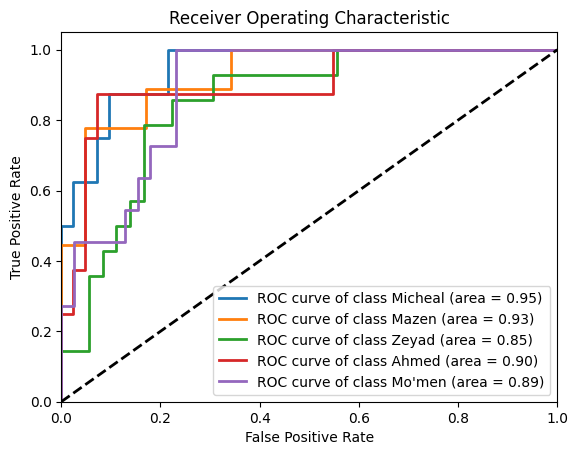

In [140]:
# Call the roc function to plot the ROC curve
roc(images, y_prob, label_names)
